In [1]:
"""
Timings were recorded during the model trainings.
This loads the results of that file and includes some
Visualisation and T-test 
"""

import pandas as pd
import numpy as np

def parseFile(filename):
    with open(filename,'r') as f:
        all=[]
        for data in f:

            info = data.split(',',7)

            timing=float (info[-1])
            
            messyaug=info[0]
            aug = messyaug.split("'")[1]

            messymodel  = info[6] 
            model = messymodel.split("'")[1]
          

            all.append([timing,aug,model])
        return all
    

df = pd.DataFrame(parseFile('.\\data\\timings\\EllipticTimingsALL.txt'))

colnames=['timing','aug',  'model'] 
df.columns=colnames
df.head()

,timing,aug,model
0,411.38,splitpc2,sage
1,329.72,splitpc2,gcn
2,665.04,splitpc2,gat
3,274.93,splitpc2,sage
4,308.75,splitpc2,gcn


In [2]:
model_training_time_by_aug=df[['aug','timing']].groupby(['aug']).agg(['count','mean', 'std', 'min', 'max'])
model_training_time_by_aug

timing                                         
             count        mean         std     min      max
aug                                                        
logarithmic     15  315.623333  167.858705   40.20   669.20
none            10  508.356000  168.659357  246.28   764.98
permute         18  450.431667  331.434853  210.32  1673.52
rotate           7  416.100000  309.348113   52.61   973.47
split           10  505.751000  185.157715  305.79   820.54
splitpc          9  880.594444  245.866428  669.12  1296.79
splitpc2        28  800.529286  586.970786   19.04  1981.82
zscore          10  458.837000  151.291708  257.97   678.25

In [3]:
from scipy.stats import ttest_ind,shapiro

In [4]:
small_df=df[['aug','timing','model']]
group1 = small_df[small_df['aug'].str.startswith('split')]
group2 = small_df[small_df['aug']=='permute' ]

ttest_ind(group1['timing'], group2['timing'], equal_var=False)

TtestResult(statistic=2.866544347795099, pvalue=0.006275050666618752, df=45.304638984348834)

In [ ]:
small_df=df[['aug','timing','model']]
# Condition for 'model' column to equal 'amodel'
condition1 = small_df['model'] == 'sage'
condition1a = small_df['model'] == 'gat'
condition2 = small_df['aug'].str.startswith('split')

group1 = df[condition1 & condition2]
group2 = df[condition1a & condition2]
# group1 = small_df[small_df['model']=='sage']
# group2 = small_df[small_df['model']=='gat' ]

ttest_ind(group1['ill_f1_val'], group2['ill_f1_val'], equal_var=False)

In [12]:
model_training_time_by_model=df[['model','timing']].groupby(['model']).agg(['count','mean', 'std', 'min', 'max'])
print(model_training_time_by_model)

      timing                                        
       count        mean         std    min      max
model                                               
gat       42  714.308333  460.394247  37.09  1981.82
gcn       32  512.291250  344.527441  19.04  1413.22
sage      33  437.277576  326.576173  40.20  1322.02


In [13]:
timebyAugModel=df[['aug','model','timing']].groupby(['aug','model']).agg(['count','mean', 'std', 'min', 'max'])
print(timebyAugModel)

                  timing                                           
                   count         mean         std      min      max
aug         model                                                  
logarithmic gat        4   453.647500  143.747326   378.34   669.20
            gcn        6   332.403333  150.495157   148.88   506.66
            sage       5   185.068000  118.450639    40.20   354.19
none        gat        6   602.928333  113.252045   482.32   764.98
            gcn        2   363.800000  166.198378   246.28   481.32
            sage       2   369.195000  173.417938   246.57   491.82
permute     gat        6   589.426667  550.263419   210.32  1673.52
            gcn        6   387.675000  142.350056   249.07   535.56
            sage       6   374.193333  124.695987   259.31   505.01
rotate      gat        2   557.165000  107.218601   481.35   632.98
            gcn        2   635.220000  478.357737   296.97   973.47
            sage       3   175.976667  111.91986

In [14]:
import seaborn as sns
#sns.set_theme(style="whitegrid", palette="pastel")
sns.set_theme(style="whitegrid") # , palette="muted"
sns.despine(left=True)

<Figure size 640x480 with 0 Axes>

C:\Users\seven\AppData\Local\Temp\ipykernel_18648\1413985675.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([  "Split 50/50", "Split 70/30","Split 75/25", "None", "Z-Score","Log X","Permute", "Rotate"],


[]

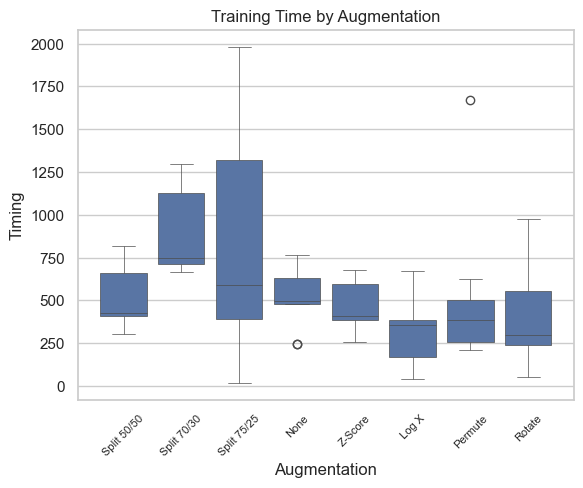

In [16]:
data=df[['aug','timing']]

 
ax=sns.boxplot(x="aug",
                y="timing"
                , data=data
                , order=["split", "splitpc","splitpc2","none", "zscore","logarithmic","permute", "rotate"]
                , linewidth=0.5
                )


ax.set(xlabel='Augmentation',ylabel='Timing')
ax.set_title('Training Time by Augmentation')
ax.set_xticklabels([  "Split 50/50", "Split 70/30","Split 75/25", "None", "Z-Score","Log X","Permute", "Rotate"],
                    rotation=45, fontsize=8)
ax.plot()